In [13]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached h5py-3.1

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf

# Replace with your company's ticker symbol
ticker = "MSFT" 

# Download historical data
data = yf.download(ticker, start="1986-05-13", end="2025-05-05", interval="1d")

# Save to CSV
data.to_csv(f"{ticker}.csv")

print("CSV file downloaded!")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

CSV file downloaded!


In [3]:
import pandas as pd
df = pd.read_csv("MSFT.csv")
df

,Price,Close,High,Low,Open,Volume
0,Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
1,Date,NaN,NaN,NaN,NaN,NaN
2,1986-05-13,0.06876972317695618,0.06930278853538191,0.06823665781853044,0.06823665781853044,3830400
3,1986-05-14,0.06823669373989105,0.06876975937893477,0.06823669373989105,0.06876975937893477,9302400
4,1986-05-15,0.06823669373989105,0.06930282501797848,0.06823669373989105,0.06823669373989105,3801600
...,...,...,...,...,...,...
9817,2025-04-28,391.1600036621094,392.739990234375,386.6400146484375,391.9599914550781,16579400
9818,2025-04-29,394.0400085449219,395.1000061035156,390.3800048828125,391.29998779296875,14974000
9819,2025-04-30,395.260009765625,396.6600036621094,384.44000244140625,390.29998779296875,36461100
9820,2025-05-01,425.3999938964844,436.989990234375,424.8999938964844,431.1099853515625,58938100


In [4]:
import pandas as pd
# Read the CSV file as you did before
df = pd.read_csv('MSFT.csv', header=None)
# Drop the first two rows (index 0 and 1)
df = df.iloc[2:].reset_index(drop=True)
# Keep only the 'Price' and 'Close' columns (these are columns 0 and 1)
df = df[[0, 1]]
# Rename the columns for clarity
df.columns = ['Date', 'Close']
# Drop rows with NaN values (if any)
df = df.dropna()
# Optional: Convert 'Date' to datetime and 'Close' to float
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
# Drop any rows that became NaN after conversion
df = df.dropna()
df

,Date,Close
1,1986-05-13,0.068770
2,1986-05-14,0.068237
3,1986-05-15,0.068237
4,1986-05-16,0.068770
5,1986-05-19,0.067704
...,...,...
9816,2025-04-28,391.160004
9817,2025-04-29,394.040009
9818,2025-04-30,395.260010
9819,2025-05-01,425.399994


In [5]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [6]:
print(df.dtypes)

Date     datetime64[ns]
Close           float64
dtype: object


In [7]:
df.index = df.pop('Date')
df

,Close
Date,
1986-05-13,0.068770
1986-05-14,0.068237
1986-05-15,0.068237
1986-05-16,0.068770
1986-05-19,0.067704
...,...
2025-04-28,391.160004
2025-04-29,394.040009
2025-04-30,395.260010


In [8]:
print(df.index)
print(df['Close'].head())
print(df['Close'].dtype)

DatetimeIndex(['1986-05-13', '1986-05-14', '1986-05-15', '1986-05-16',
               '1986-05-19', '1986-05-20', '1986-05-21', '1986-05-22',
               '1986-05-23', '1986-05-27',
               ...
               '2025-04-21', '2025-04-22', '2025-04-23', '2025-04-24',
               '2025-04-25', '2025-04-28', '2025-04-29', '2025-04-30',
               '2025-05-01', '2025-05-02'],
              dtype='datetime64[ns]', name='Date', length=9820, freq=None)
Date
1986-05-13    0.068770
1986-05-14    0.068237
1986-05-15    0.068237
1986-05-16    0.068770
1986-05-19    0.067704
Name: Close, dtype: float64
float64


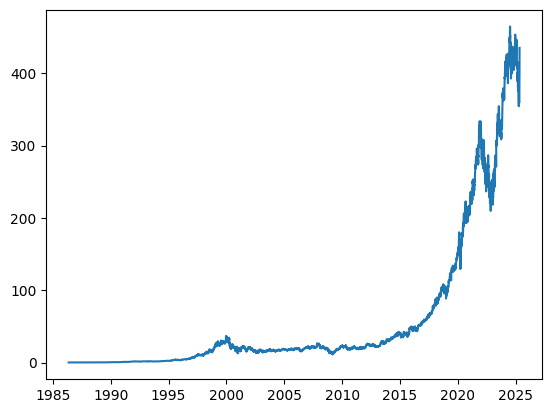

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [33]:
import numpy as np
import pandas as pd
import datetime

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date
    dates = []
    X, Y = [], []
    last_time = False

    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = next_date_str.split('-')
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
    X = np.array(X)

    for i in range(n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y
    return ret_df

windowed_df = df_to_windowed_df(df, 
                                '2022-03-25', 
                                '2025-01-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-03-25,296.392059,291.937347,296.431030,296.021637
1,2022-03-28,291.937347,296.431030,296.021637,302.864655
2,2022-03-29,296.431030,296.021637,302.864655,307.455780
3,2022-03-30,296.021637,302.864655,307.455780,305.944885
4,2022-03-31,302.864655,307.455780,305.944885,300.534851
...,...,...,...,...,...
705,2025-01-16,416.355164,414.838226,425.456909,423.730347
706,2025-01-17,414.838226,425.456909,423.730347,428.171478
707,2025-01-21,425.456909,423.730347,428.171478,427.642517
708,2025-01-22,423.730347,428.171478,427.642517,445.307129


In [34]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((710,), (710, 3, 1), (710,))

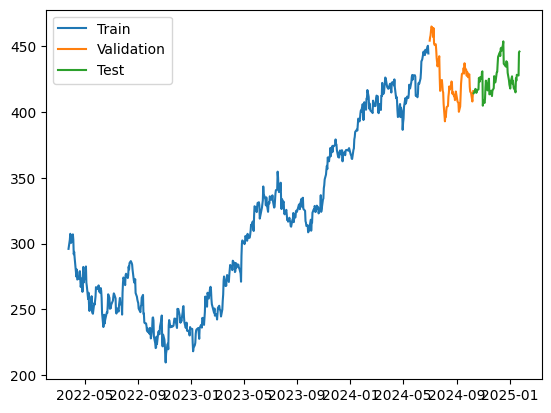

In [35]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 98806.5234 - mean_absolute_error: 307.9001 - val_loss: 178493.6250 - val_mean_absolute_error: 422.1202
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 100751.6719 - mean_absolute_error: 310.5817 - val_loss: 175811.1250 - val_mean_absolute_error: 418.9307
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 96222.3047 - mean_absolute_error: 303.6898 - val_loss: 170935.2188 - val_mean_absolute_error: 413.0690
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 93666.6328 - mean_absolute_error: 299.1076 - val_loss: 161955.7656 - val_mean_absolute_error: 402.0541
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 90047.8438 - mean_absolute_error: 292.6292 - val_loss: 148754.0156 - val_mean_absolute_error: 385.2858
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 74972.3594 - mean_absolute_error: 265.9263 - val_loss: 129374.0703 - val_mean_absolute_error: 359.2574
Epoch 7/100
18/18 ━━━

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


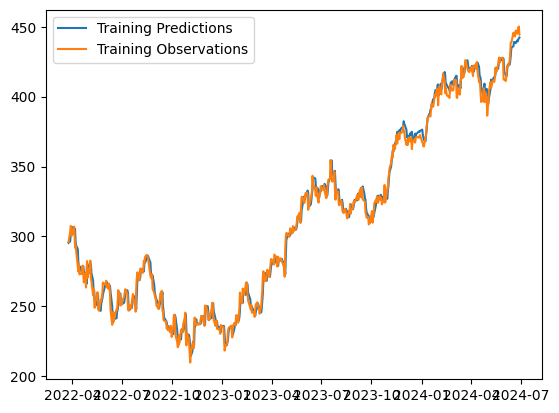

In [37]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


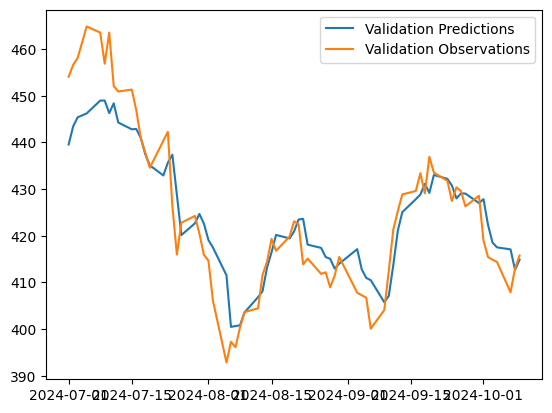

In [38]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


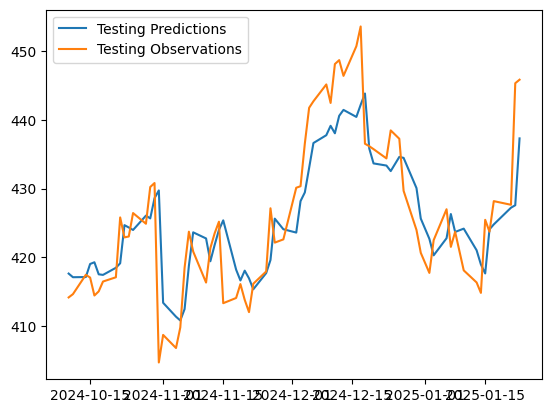

In [39]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

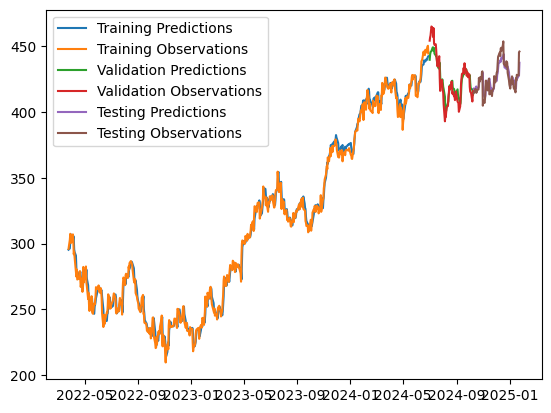

In [40]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [41]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━

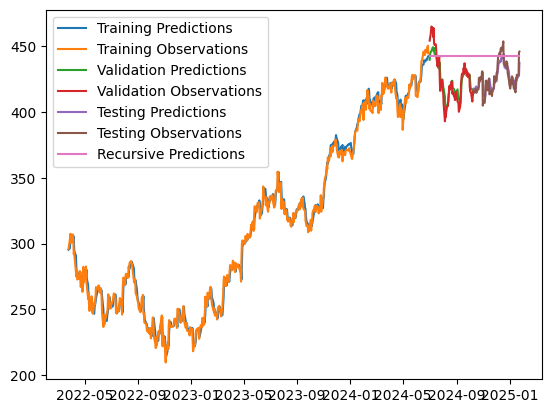

In [44]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])